In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("df_143.csv", header=0)

/var/folders/9z/qkggffxn7svfwp9gp9tll_0r0000gn/T/ipykernel_73570/4183733508.py:1: DtypeWarning: Columns (101) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_143.csv", header=0)


In [10]:
df.head()

,ID,SIGNID,OPD_DATE,WEEKDAY,DIVISIONID,DIVISIONABBR,SERVICEGROUPID,SERVICEGROUPABBR,EXCCOMBOID,EXCCOMBOABBR,...,Pkg_Exec_GUID,CreatedDate,LastModifiedDate,CTE,POINT_IDX_C,DWELLTIME,POINT_F,POINT_L,TERMINAL,LAYOVER
0,6102409807,143,2024-09-01,7_SUN,1,DIV7,3,3_SNHL,24645.0,09SUCW10,...,C1840FAC-6610-4024-9257-8D7B149A26E4,2024-09-06 05:22:17.657,NaN,PATTERN_TRIPID,NaN,NaN,NaN,NaN,NaN,NaN
1,6102409808,143,2024-09-01,7_SUN,1,DIV7,3,3_SNHL,24645.0,09SUCW10,...,C1840FAC-6610-4024-9257-8D7B149A26E4,2024-09-06 05:22:17.657,NaN,PATTERN_TRIPID,NaN,NaN,NaN,NaN,NaN,NaN
2,6102409816,143,2024-09-01,7_SUN,1,DIV7,3,3_SNHL,24645.0,09SUCW10,...,C1840FAC-6610-4024-9257-8D7B149A26E4,2024-09-06 05:22:17.657,NaN,PATTERN_TRIPID,NaN,NaN,NaN,NaN,NaN,NaN
3,6102409817,143,2024-09-01,7_SUN,1,DIV7,3,3_SNHL,24645.0,09SUCW10,...,C1840FAC-6610-4024-9257-8D7B149A26E4,2024-09-06 05:22:17.657,NaN,PATTERN_TRIPID,NaN,NaN,NaN,NaN,NaN,NaN
4,6102408629,143,2024-09-01,7_SUN,1,DIV7,3,3_SNHL,24645.0,09SUCW10,...,C1840FAC-6610-4024-9257-8D7B149A26E4,2024-09-06 05:22:17.657,NaN,PATTERN_TRIPID,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df['OPD_DATE'] = pd.to_datetime(df['OPD_DATE'], format='%Y-%m-%d')

In [12]:
print(f"OPD_DATE Range: {df['OPD_DATE'].min()} to {df['OPD_DATE'].max()}")

OPD_DATE Range: 2024-09-01 00:00:00 to 2024-11-02 00:00:00


In [14]:
columns_to_drop = ['ID', 'DIVISIONID', 'DIVISIONABBR', 'SERVICEGROUPID', 'BLOCKID_TRP',
                   'BLOCK_ID_INT', 'LINEID_TRP', 'LINEDIRID_TRP', 'LINEABBR', 'LINE_ID_INT', 'LINECLUSTERABBR',
                   'PATTERN_ID_INT', 'PATTERNID_TRP', 'TRIPID_TRP', 'TRIPID_INT', 'DIRNUM', 'TRIP_CODE', 'TRIP_CODE1',
                   'TRIP_TYPE', 'APC_QUALITY', 'DRIVER', 'POINT_IDX', 'POINT_ID', 'STOPNAME', 'STOPCLUSTERID',
                   'NODEABBR', 'NODE_SEQ_ABBR', 'BOARDING_VALID', 'ALIGHTING_VALID', 'LOAD_VALID', 'OTP_STOP',
                   'Source_ID', 'Pkg_Exec_GUID', 'POINT_IDX_C', 'DWELLTIME', 'POINT_F', 'POINT_L', 'TERMINAL', 'LAYOVER','TRIPNUM_TRP','TRIP_ID_INT']

In [15]:
df_final = df.drop(columns=columns_to_drop)

In [16]:
# Key Measures Calculation
df_final['RUN_TIME'] = df_final.groupby('EVENT_NO_TRIP')['ACT_ARR_TIME'].shift(-1) - df_final['ACT_DEP_TIME']
df_final['TIME_DIFF_ARR'] = df_final['ACT_ARR_TIME'] - df_final['ETIME']
df_final['TIME_DIFF_DEP'] = df_final['ACT_DEP_TIME'] - df_final['ETIME']
df_final['TIME_DIFF_START'] = df_final['ACT_START_TIME'] - df_final['SCHED_START_TIME']
df_final['TIME_DIFF_END'] = df_final['ACT_END_TIME'] - df_final['SCHED_END_TIME']
df_final['SPEED_STOP_TO_STOP'] = df_final['DISTANCE_TO_NEXT'] / df_final['RUN_TIME']
df_final['SPEED_TRIP'] = df_final['ACT_DISTANCE'] / df_final['ACT_TRIP_TIME']

In [17]:
df_final['SERVICEGROUPABBR'] = df_final['SERVICEGROUPABBR'].apply(lambda x: x if x in ['1_WK', '2_SAT'] else '3_SUNHOL')

In [18]:
import math

def fn_HH24MM(time_sec):
    # Calculate hours, minutes, and seconds
    if math.isnan(time_sec):
        return None
    else:
        hours = math.floor(time_sec / 3600)
        minutes = math.floor((time_sec % 3600) / 60)
        seconds = math.floor(time_sec % 60)
       
        # Format the time as HH:MM:SS
        time_hhmm = f"{hours:02}:{minutes:02}:{seconds:02}"
       
        return time_hhmm

In [19]:
df_final['ACT_ARR_TIME_HHMM'] = df_final['ACT_ARR_TIME'].apply(fn_HH24MM)

In [20]:
df_final['ACT_ARR_TIME_HHMM']

0         18:24:19
1         18:30:31
2         18:18:18
3         18:27:45
4         19:55:13
            ...   
340364    24:51:26
340365    24:53:36
340366    24:23:33
340367    24:29:14
340368    24:39:10
Name: ACT_ARR_TIME_HHMM, Length: 340369, dtype: object

In [21]:
df_final['ACT_DEP_TIME_HHMM'] = df_final['ACT_DEP_TIME'].apply(fn_HH24MM)

In [22]:
df_final["Hour"] = (df_final['ACT_ARR_TIME'] // 3600) % 24

In [23]:
st1 = df_final[df_final['PATTERN'] == 601001].groupby(['SERVICEGROUPABBR'])[['DWELL_TIME', 'MISSED_STOP']].describe()
print(st1)

                 DWELL_TIME                                               \
                      count       mean        std  min   25%   50%   75%   
SERVICEGROUPABBR                                                           
1_WK                86750.0  27.449983  30.835379  0.0  16.0  21.0  30.0   
2_SAT               16730.0  24.908010  28.801174  0.0  14.0  20.0  28.0   
3_SUNHOL            14737.0  25.139174  28.752529  0.0  15.0  20.0  28.0   

                         MISSED_STOP                                          \
                     max       count      mean       std  min  25%  50%  75%   
SERVICEGROUPABBR                                                               
1_WK              1104.0     88259.0  0.017097  0.129635  0.0  0.0  0.0  0.0   
2_SAT              476.0     17011.0  0.016519  0.127463  0.0  0.0  0.0  0.0   
3_SUNHOL           761.0     14852.0  0.007743  0.087656  0.0  0.0  0.0  0.0   

                       
                  max  
SERVICEGROUPAB

In [24]:
st2 = df_final[df_final['PATTERN'] == 601001].groupby(['SERVICEGROUPABBR'])[['MISSED_TRIP', 'IS_ADDITIONAL']].describe()
print(st2)

                 MISSED_TRIP                                               \
                       count      mean       std  min  25%  50%  75%  max   
SERVICEGROUPABBR                                                            
1_WK                 88259.0  0.002447  0.049410  0.0  0.0  0.0  0.0  1.0   
2_SAT                17011.0  0.003174  0.056254  0.0  0.0  0.0  0.0  1.0   
3_SUNHOL             14852.0  0.003636  0.060191  0.0  0.0  0.0  0.0  1.0   

                 IS_ADDITIONAL                                     
                         count mean  std  min  25%  50%  75%  max  
SERVICEGROUPABBR                                                   
1_WK                   88259.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2_SAT                  17011.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3_SUNHOL               14852.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  


In [25]:
df_final[df_final["IS_ADDITIONAL"] == '1']

,SIGNID,OPD_DATE,WEEKDAY,SERVICEGROUPABBR,EXCCOMBOID,EXCCOMBOABBR,BLOCK,PATTERN,DIRECTION,EVENT_NO_TRIP,...,RUN_TIME,TIME_DIFF_ARR,TIME_DIFF_DEP,TIME_DIFF_START,TIME_DIFF_END,SPEED_STOP_TO_STOP,SPEED_TRIP,ACT_ARR_TIME_HHMM,ACT_DEP_TIME_HHMM,Hour


In [26]:
df_final['Month'] = df_final['OPD_DATE'].dt.to_period('M').astype(str)

In [27]:
df_final['Month']

0         2024-09
1         2024-09
2         2024-09
3         2024-09
4         2024-09
           ...   
340364    2024-11
340365    2024-11
340366    2024-11
340367    2024-11
340368    2024-11
Name: Month, Length: 340369, dtype: object

In [68]:
def time_bucket(seconds):
    hour = seconds // 3600
    if 0 <= hour < 6:
        return 'Early AM'
    elif 6 <= hour < 9:
        return 'AM Peak'
    elif 9 <= hour < 15:
        return 'Mid Day'
    elif 15 <= hour < 19:
        return 'PM Peak'
    elif 19 <= hour < 22:
        return 'Evening'
    elif 22 <= hour < 24:
        return 'Late Evening'
    else:
        return 'Invalid'

In [69]:
df_final['TimeOfDay'] = df_final['SCHED_START_TIME'].apply(time_bucket)

In [70]:
avg_boarding = df_final.groupby(['Month', 'TimeOfDay'])['BOARDING'].mean().reset_index()

In [71]:
avg_alighting = df_final.groupby(['Month', 'TimeOfDay'])['ALIGHTING'].mean().reset_index()

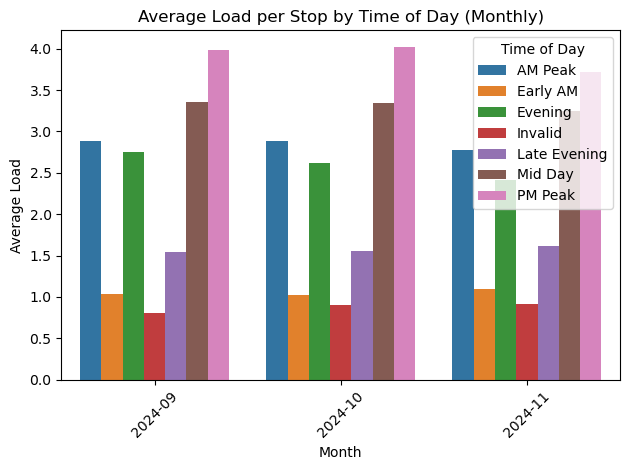

In [72]:
plt.figure()
sns.barplot(data=avg_alighting, x='Month', y='ALIGHTING', hue='TimeOfDay')
plt.title('Average Load per Stop by Time of Day (Monthly)')
plt.ylabel('Average Load')
plt.xlabel('Month')
plt.legend(title='Time of Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("avg_load_per_stop.png")

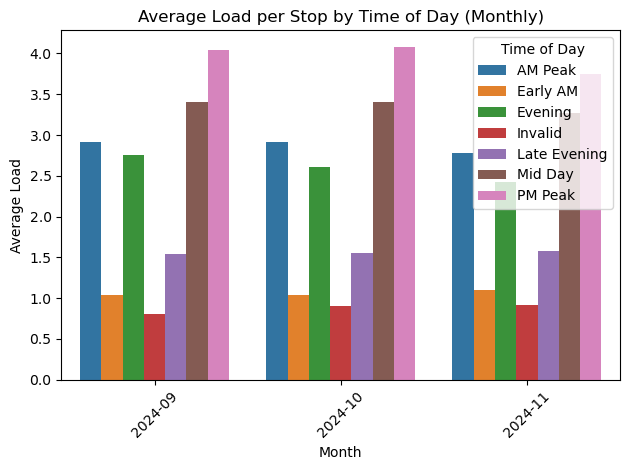

In [73]:
plt.figure()
sns.barplot(data=avg_boarding, x='Month', y='BOARDING', hue='TimeOfDay')
plt.title('Average Load per Stop by Time of Day (Monthly)')
plt.ylabel('Average Load')
plt.xlabel('Month')
plt.legend(title='Time of Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("avg_load_per_stop.png")

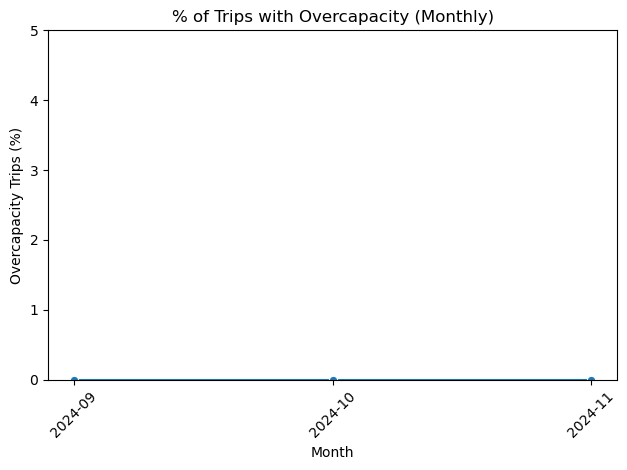

In [32]:
# Mark overloaded trips
df_final['IsOverloaded'] = df_final['LOAD_EXTRA'] > 0

# % of overloaded trips per month
overload_pct = df_final.groupby('Month')['IsOverloaded'].mean().reset_index()
overload_pct['IsOverloaded'] *= 100  # convert to %

# Plot
plt.figure()
sns.lineplot(data=overload_pct, x='Month', y='IsOverloaded', marker='o')
plt.title('% of Trips with Overcapacity (Monthly)')
plt.ylabel('Overcapacity Trips (%)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylim(0, overload_pct['IsOverloaded'].max() + 5)
plt.tight_layout()
plt.savefig("overcapacity_trips_pct.png")


In [49]:
trip_util = df_final.groupby(['OPD_DATE', 'EVENT_NO_TRIP']).agg({
    'LOAD': 'max'
}).reset_index()

In [50]:
trip_util['TripUtilization'] = trip_util['LOAD'] / df_final['CAPACITY'][0]

# Step 2: Daily utilization (average across all trips that day)
daily_util = trip_util.groupby('OPD_DATE')['TripUtilization'].mean().reset_index()
daily_util.rename(columns={'TripUtilization': 'DailyUtilization'}, inplace=True)

# Step 3: Monthly index (average daily utilization)
daily_util['Month'] = daily_util['OPD_DATE'].dt.to_period('M').dt.to_timestamp()
monthly_util = daily_util.groupby('Month')['DailyUtilization'].mean().reset_index()

In [52]:
df_final[df_final['EVENT_NO_TRIP'] == 1276640681].to_clipboard()

In [45]:
trip_util

,OPD_DATE,EVENT_NO_TRIP,LOAD,TripUtilization
0,2024-09-01,1276640681,624.0,8.320000
1,2024-09-01,1276640863,596.0,7.946667
2,2024-09-01,1276641038,644.0,8.586667
3,2024-09-01,1276641220,478.0,6.373333
4,2024-09-01,1276641405,895.0,11.933333
...,...,...,...,...
16469,2024-11-02,1308599177,203.0,2.706667
16470,2024-11-02,1308599359,72.0,0.960000
16471,2024-11-02,1308599536,168.0,2.240000
16472,2024-11-02,1308599716,26.0,0.346667


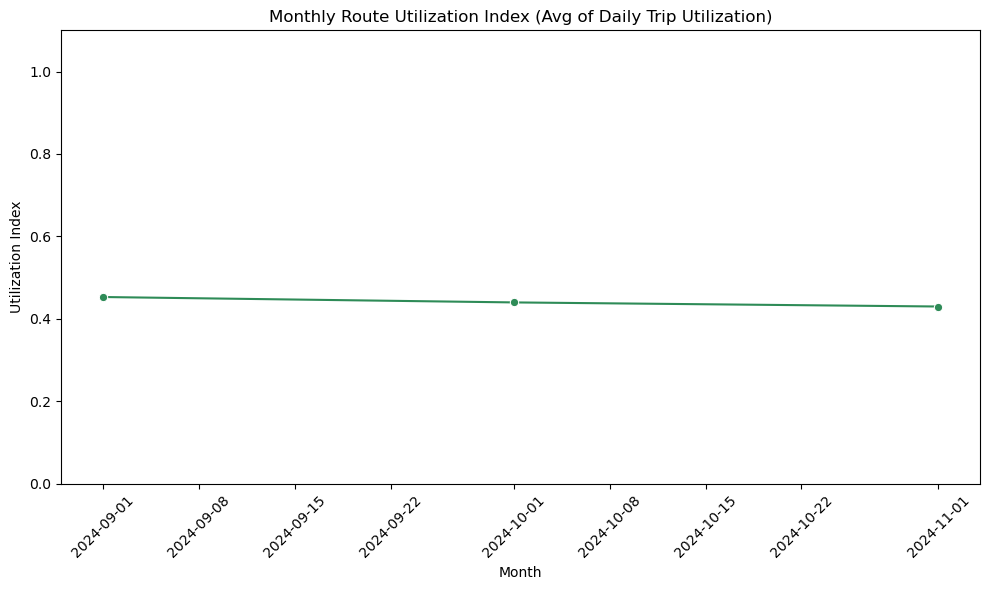

In [53]:
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_util, x='Month', y='DailyUtilization', marker='o', color='seagreen')

plt.title('Monthly Route Utilization Index (Avg of Daily Trip Utilization)')
plt.ylabel('Utilization Index')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig("monthly_trip_based_utilization.png")
plt.show()

In [57]:
trip_util['Month'] = trip_util['OPD_DATE'].dt.to_period('M').dt.to_timestamp()

monthly_util = trip_util.groupby('Month')['TripUtilization'].mean().reset_index()

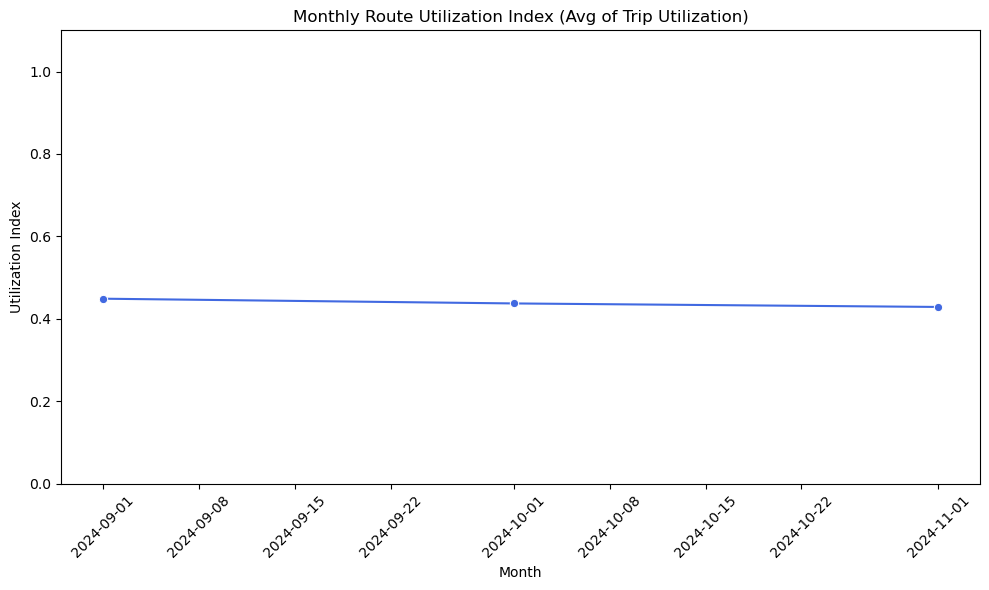

In [58]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_util, x='Month', y='TripUtilization', marker='o', color='royalblue')

plt.title('Monthly Route Utilization Index (Avg of Trip Utilization)')
plt.ylabel('Utilization Index')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig("monthly_avg_trip_utilization.png")
plt.show()

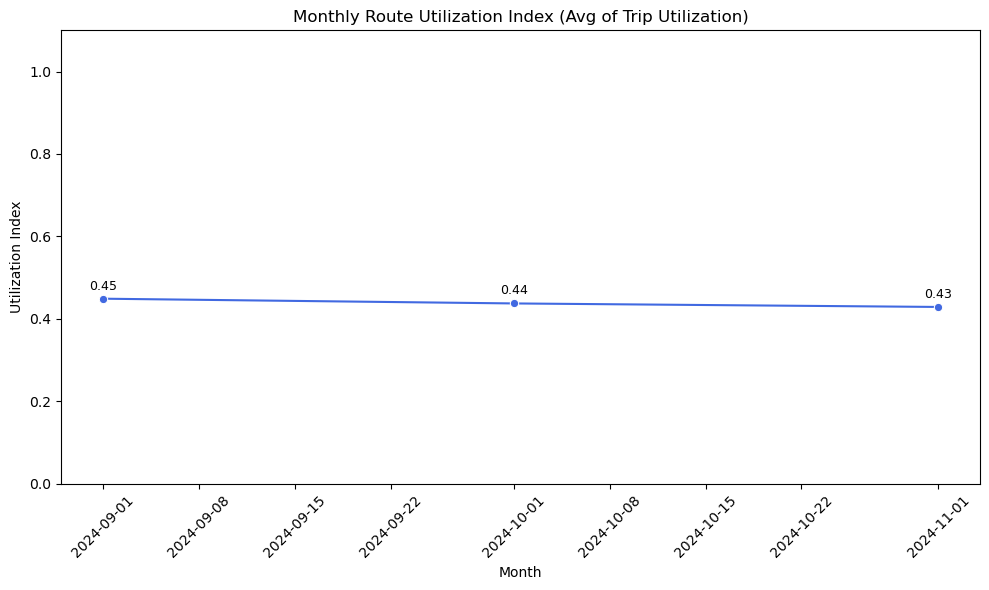

In [59]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_util, x='Month', y='TripUtilization', marker='o', color='royalblue')

# Add value labels
for i, row in monthly_util.iterrows():
    plt.text(row['Month'], row['TripUtilization'] + 0.015, f"{row['TripUtilization']:.2f}", 
             ha='center', va='bottom', fontsize=9, color='black')

plt.title('Monthly Route Utilization Index (Avg of Trip Utilization)')
plt.ylabel('Utilization Index')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig("monthly_avg_trip_utilization_labeled.png")
plt.show()

In [40]:
df_final['LOAD'][0]

36.0

In [41]:
df_final['CAPACITY'][0]

75.0

In [39]:
df_final['CAPACITY_MAX']

0         93.0
1         93.0
2         93.0
3         93.0
4         93.0
          ... 
340364    93.0
340365    93.0
340366    93.0
340367    93.0
340368    93.0
Name: CAPACITY_MAX, Length: 340369, dtype: float64

In [ ]:
monthly_stop_summary = df.groupby(['Month', 'STOPABBR', 'STOPNAME']).agg({
    'BOARDING': 'sum',
    'ALIGHTING': 'sum',
    'LOAD': 'mean'  # keep this as average
}).reset_index()